# OLSのロバスト標準誤差


## 単回帰モデルの場合

$n$個の観測値による単回帰モデルを想定する。

$$
Y_i=\alpha+\beta X_i+u_i, \quad i=1,2, \ldots, n
$$

### 推定量

$$
\begin{cases}
\sum \hat{u}_i=\sum(Y_i-\hat{\alpha}-\hat{\beta} X_i)=0 \\
\sum \hat{u}_i X_i=\sum(Y_i-\hat{\alpha}-\hat{\beta} X_i) X_i=0
\end{cases}
\Rightarrow
\hat{\alpha}=\bar{Y}-\hat{\beta} \bar{X}, \quad \hat{\beta}=\frac{S_{X Y}}{S_{X X}}
$$

ここで、

$$
S_{X X}=\sum(X_i-\bar{X}) X_i, \quad S_{X Y}=\sum(X_i-\bar{X}) Y_i
$$

であるため、$\hat{\beta}$の式に代入すると

$$
\hat{\beta}
=\frac{S_{X Y}}{S_{X X}}
=\frac{\sum(X_i-\bar{X}) Y_i}{S_{X X}}
=\sum\left(\frac{X_i-\bar{X}}{S_{X X}}\right) Y_i
=\sum w_i Y_i,
\quad w_i=\frac{X_i-\bar{X}}{S_{X X}}
$$

となり、OLS推定量$\hat\beta$は$w_i$という重みによる$Y_i$の線形和の形になっている


### 推定量の誤差

$$
\begin{aligned}
\hat{\beta}
=\sum w_i Y_i
=\sum w_i\left(\alpha+\beta X_i+u_i\right)
&=\alpha \underbrace{\sum w_i}_{=0}+\beta \underbrace{\sum w_i X_i}_{=1}+\sum w_i u_i \\
& =\beta+\sum w_i u_i
\end{aligned}
$$

と、$\hat\beta$は真値$\beta$の周りを誤差の加重和$\sum w_i u_i$の分だけばらつく確率変数であり、一般に$\hat\beta\neq\beta$であることがわかる。

誤差項$u_i$の仮定により、推定誤差の期待値はゼロになる

$$
E(\sum_{i=1}^n w_i u_i) =\sum_{i=1}^n w_i \underbrace{ E(u_i) }_{=0} = 0
$$

### 古典的線形回帰モデルの場合

古典的な線形回帰モデルの仮定のうち、

> 母分散が均一：$\operatorname{Var}(u_i) = E(u_i^2) = \sigma^2$

というものが関わってくる

#### 推定量の分散

$$
\operatorname{Var}(\sum_{i=1}^n w_i u_i)
= \sum_{i=1}^n w_i^2 \operatorname{Var}(u_i)
= \sigma^2 \sum_{i=1}^n w_i^2
= \frac{\sigma^2}{S_{XX}}
$$

最後の等式は$\sum_{i=1}^n w_i^2=\frac{1}{S_{XX}}$を利用している

よって

$$
\mathrm{E}(\hat{\beta})=\beta
, \quad
\operatorname{Var}(\hat{\beta})=\frac{\sigma^2}{S_{X X}}=\frac{\sigma^2}{\sum(X_i-\bar{X})^2}
=\frac{\sigma^2}{(n-1) s_X^2}
$$

$s_X^2$は$X$の標本分散。サンプル数$n$が大きいほど$\operatorname{Var}(\hat{\beta})$は減少する

#### 条件付き分散

$$
\begin{aligned}
\operatorname{Var}\left(\hat{\beta} \mid X_1, X_2, \ldots, X_n\right)
&=\frac{1}{S_{X X}^2} \sum\left(X_i-\bar{X}\right)^2 \sigma^2\\
&=\frac{\sigma^2}{S_{X X}^2} \underbrace{ \sum(X_i-\bar{X})^2 }_{= S_{X X}} \\
&=\frac{\sigma^2}{S_{X X}}
\end{aligned}
$$

### 不均一分散

$$
\operatorname{Var}(u_i) = E(u_i^2) = \sigma^2_i
$$

#### 条件付き分散

不均一分散のもとで、OLS推定量の条件付き分散は

$$
\operatorname{Var}\left(\hat{\beta} \mid X_1, X_2, \ldots, X_n\right)=\frac{1}{S_{X X}^2} \sum\left(X_i-\bar{X}\right)^2 \sigma_i^2
$$

と、均一分散の場合より複雑になる

#### 漸近分散

OLSは漸近正規推定量になる

$$
\hat{\beta} \stackrel{a}{\sim} \mathrm{N}(\beta, \operatorname{Avar}(\hat{\beta}))
,\quad
\operatorname{Avar}(\hat{\beta})=\frac{1}{n \sigma_X^4} \mathrm{E}\left[\left(X_i-\mu_X\right)^2 \sigma_i^2\right]
$$

$\operatorname{Avar}(\hat{\beta})$は未知の$\sigma^2_i$を含んでいるので、何らかの方法で推定する

### Whiteの標準誤差

よく使われる推定量は、ホワイトの頑健な分散推定量

$$
V = \frac{1}{n s_X^4} \cdot \frac{1}{n} \sum\left(X_i-\bar{X}\right)^2 \hat{u}_i^2=\frac{1}{n^2 s_X^4} \sum\left(X_i-\bar{X}\right)^2 \hat{u}_i^2
$$

その平方根はホワイトの標準誤差として知られる

$$
\text { s.e. }(\hat{\beta})=\sqrt{V}=\frac{1}{n s_X^2} \sqrt{\sum\left(X_i-\bar{X}\right)^2 \hat{u}_i^2}
$$

## 重回帰モデルの場合

$n\in\mathbb{N}$個の観測値があるとし、目的変数$Y\in \mathbb{R}^n$、説明変数$X\in\mathbb{R}^{n\times m}$、誤差項$u\in\mathbb{R}^n$について

$$
Y = X \beta + u
$$

という線形モデルを考える


### 推定量の誤差

OLS推定量

$$
\hat{\beta} = (X^T X)^{-1} X^T Y
$$

を真値+αの形式にすると、

$$
\begin{aligned}
\hat{\beta}
&= (X^T X)^{-1} X^T Y\\
&= (X^T X)^{-1} X^T (X\beta + u)\\
&= \underbrace{ (X^T X)^{-1} X^T X}_{=I} \beta + (X^T X)^{-1} X^T u\\
&= \beta + (X^T X)^{-1} X^T u\\
&= \beta + \left(\frac{1}{n} X^T X \right)^{-1} \frac{1}{n} X^T u\\
\end{aligned}
$$

と表すことができる。


### 推定量の一致性

線形回帰モデルの外生性の仮定$E(X_i u_i) = 0$が満たされるなら、

$$
\frac{1}{n} X^T u
= \frac{1}{n} \sum_{i=1}^n X_i u_i 
\overset{p}{\to} E(X_i u_i) = 0
$$

であるから、誤差の項$(X^T X)^{-1} X^T u$は消失する

### 漸近正規性

OLS推定量

$$
\hat{\beta}
= \beta + \left(\frac{1}{N} X^T X\right)^{-1} \frac{1}{N} X^T u
$$

を整理して以下の形にする

$$
\sqrt{N} (\hat{\beta} - \beta)
=
\left(
    \frac{1}{N} X^T X
\right)^{-1}
\frac{1}{\sqrt{N}} X^T u
$$

$\frac{1}{\sqrt{N}} X^T u$は$\frac{1}{\sqrt{N}} \sum^N_{i=1} X_i u_i$と書くことができる。OLSの仮定より

$$
\begin{align}
E(X_i u_i) &= 0\\
Var(X_i u_i) &= E(u^2 X_i X^T_i)
\end{align}
$$

なので、中心極限定理により

$$
\frac{1}{\sqrt{N}} X^T u
= \frac{1}{\sqrt{N}} \sum^N_{i=1} X_i u_i
 \overset{d}{\longrightarrow} N\left( 0, E(u_i^2 X_i X_i^T) \right)
$$

となる。

一致性のときに導出した

$$
\frac{1}{N} X^T X
\overset{p}{\longrightarrow} E(X_i X_i^T)
$$

を使うと、スルツキーの定理を用いて

$$
\begin{align}
\sqrt{N} (\hat{\beta} - \beta)
&=
\left(
    \frac{1}{N} X^T X
\right)^{-1}
\frac{1}{\sqrt{N}} X^T u
\overset{d}{\longrightarrow} \left( E(X_i X_i^T)  \right)^{-1} \times N\left( 0, E(u_i^2 X_i X_i^T) \right)\\
&= N\left( 0,
    \left( E(X_i X_i^T)  \right)^{-1}  E(u_i^2 X_i X_i^T)  \left( E(X_i X_i^T)  \right)^{-1}
\right)\\
&= N(0, V)\\
\end{align}
$$

となる。

:::{dropdown} スルツキーの定理

確率変数の行列$Y_N, Y, X_N, X \in \mathbb{R}^{N\times N}$、正則行列$C \in \mathbb{R}^{N\times N}$があるとする。

$N\to \infty$のとき

$$
X_N \xrightarrow{d} X\\
Y_N \xrightarrow{d} C\\
$$

とする。

このとき、以下の結果が成り立ち、これを **スルツキーの定理** という

1. $X_N + Y_N \xrightarrow{d} X + C$
2. $Y_N X_N \xrightarrow{d} C X$
3. $Y_N^{-1}X_N \xrightarrow{d} C^{-1} X$

:::

$V$は以下のように一致推定できる

$$
\begin{aligned}
\hat{V}_{\mathrm{HC0}} & =\left[\frac{1}{N} \sum_{i=1}^N X_i X_i^T\right]^{-1} \frac{1}{N} \sum_{i=1}^N \hat{u}_i^2 X_i X_i^T\left[\frac{1}{N} \sum_{i=1}^N X_i X_i^T\right]^{-1} \\
& =\left(\frac{1}{N} X^T X\right)^{-1} \frac{1}{N} X^T
\operatorname{diag}[\hat{u}_i^2] 
X\left(\frac{1}{N} X^T X\right)^{-1}
\end{aligned}
$$

ただし、$\operatorname{diag}[\hat{u}_i^2] $は対角要素に$\hat{u}_1^2, \dots, \hat{u}_N^2$を並べた対角行列である。
これはHC0と呼ばれるタイプの誤差分散の推定量である

## 漸近分散の推定量



| {estimatr}パッケージでの呼び名 | 分散の推定量$\widehat{\mathrm{V}}[\widehat{\beta}]$          | notes                                        |
| ------------------------------ | ------------------------------------------------------------ | -------------------------------------------- |
| `"classical"`                  | $\frac{\mathbf{e}^\top\mathbf{e}}{n-m} (\mathbf{X}^{\top}\mathbf{X})^{-1}$ |                                              |
| `"HC0"`                        | $(\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathrm{diag}\left[e_i^2\right]\mathbf{X}(\mathbf{X}^{\top}\mathbf{X})^{-1}$ |                                              |
| `"HC1"`, `"stata"`             | $\frac{n}{n-m}(\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathrm{diag}\left[e_i^2\right]\mathbf{X}(\mathbf{X}^{\top}\mathbf{X})^{-1}$ | Eicker-Huber-Whiteの分散推定量などと呼ばれる |
| `"HC2"` (default)              | $(\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}^{\top}\mathrm{diag}\left[\frac{e_i^2}{1-h_{ii}}\right]\mathbf{X}(\mathbf{X}^{\top}\mathbf{X})^{-1}$ |                                              |
| `"HC3"`                        | $(\mathbf{X}^{\top}\mathbf{X})^{-1}\mathbf{X}{\top}\mathrm{diag}\left[\frac{e_i^2}{(1-h_{ii})^2}\right]\mathbf{X}(\mathbf{X}^{\top}\mathbf{X})^{-1}$ |                                              |

- $h_{ii}=X_i (X^T X)^{-1} X_i^T$
- $e_i = Y_i - X_i \hat{\beta}$
- $m$は推定量の次元数

出所：[estimatr](https://declaredesign.org/r/estimatr/articles/mathematical-notes.html)パッケージのドキュメント

## 参考

- 鹿野繁樹. (2015). 新しい計量経済学: データで因果関係に迫る.
- [Mathematical notes for estimatr • estimatr](https://declaredesign.org/r/estimatr/articles/mathematical-notes.html)
- [不均一分散 — Pythonで学ぶ入門計量経済学](https://py4etrics.github.io/14_Hetero.html#id2)

## 実験（WIP)

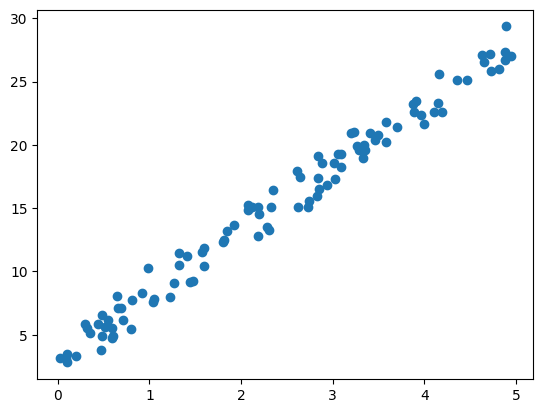

In [48]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
np.random.seed(0)
x1 = np.random.uniform(0, 5, size=(n, 1))
x0 = np.ones(shape=(n, 1))
X = np.append(x0, x1, axis=1)
beta = np.array([3, 5])

# 均一分散の場合
e = np.random.normal(loc=0, scale=1, size=n)
y = X @ beta + e

# plot
fig, ax = plt.subplots()
ax.scatter(x1, y)

In [51]:
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
beta_hat

array([3.22215108, 4.987387  ])

In [52]:
X.T @ X

array([[100.        , 236.39691976],
       [236.39691976, 766.62957534]])

In [71]:
(X[0, ] @ X[0,].T)**(-1)

0.11723457858134044